# 장고를 이용하여 게시판 앱 만들기

## 수정날짜와 작성날짜 위치 변경

In [ ]:
# 게시글의 수정날짜와 작성날짜의 표현 방식을 세로에서 가로로 변경
# templates/bbsnote/board_detail.html파일에서 코드위치를 변경 후 통합
# <h6 class="border-bottom my-3 py-2">{{board.comment_set.count}}개의 댓글이 있습니다.</h6> 아래에 다음과 같이 작성
# 보다 깔끔한 코드구성을 위해 조건문을 걸어주어 조건에 해당하면 다음의 내용을 실행하도록 한다.
    {% if board.comment_set.count > 0 %}
    <div class="mt-3">
        {% for comment in board.comment_set.all %}
            <div class="comment py-2 text-muted">
                <span style="white-space: pre-line;">{{ comment.content }}</span>
                {% if request.user == comment.author %}
                <a href="{% url 'bbsnote:comment_modify' comment.id %}" class="small">수정</a>
                <a href="#" class="small delete" data-uri="{% url 'bbsnote:comment_delete' comment.id %}">삭제</a>
                {% endif %}
                
                <div class="d-flex justify-content-end">
                    {% if comment.update_date %}
                    <div class="badge badge-light p-2 text-left">
                        <div class="mb-2">modified at</div>
                        <div>{{ comment.update_date|date:'Y-m-d H:i' }}</div>
                    </div>
                    {% endif %}
                    <div class="badge badge-light p-2 text-left">
                        <div class="mb-2">{{ comment.author.username }}</div>
                        <div>{{ comment.create_date|date:'Y-m-d A h:i' }}</div>
                    </div>
                </div>
            </div>
        {% endfor %}
    </div>
    {% endif %}

## 게시글에 줄바꿈을 가능하게 해주는 탬플릿

In [ ]:
# 게시글의 줄바꿈
# templates/bbsnote/board_detail.html파일에 수정
# <div class="card-text"> 옆부분에 다음과 같이 수정
{{ board.content | linebreaksbr }}

In [ ]:
# 댓글의 줄바꿈
# templates/bbsnote/board_detail.html파일에 수정
# <span style="white-space: pre-line;"> 옆부분에 다음과 같이 수정
{{ comment.content| linebreaksbr }}

* 아래와 같이 줄바꿈 표시가 정상적으로 된 것을 알 수 있다.

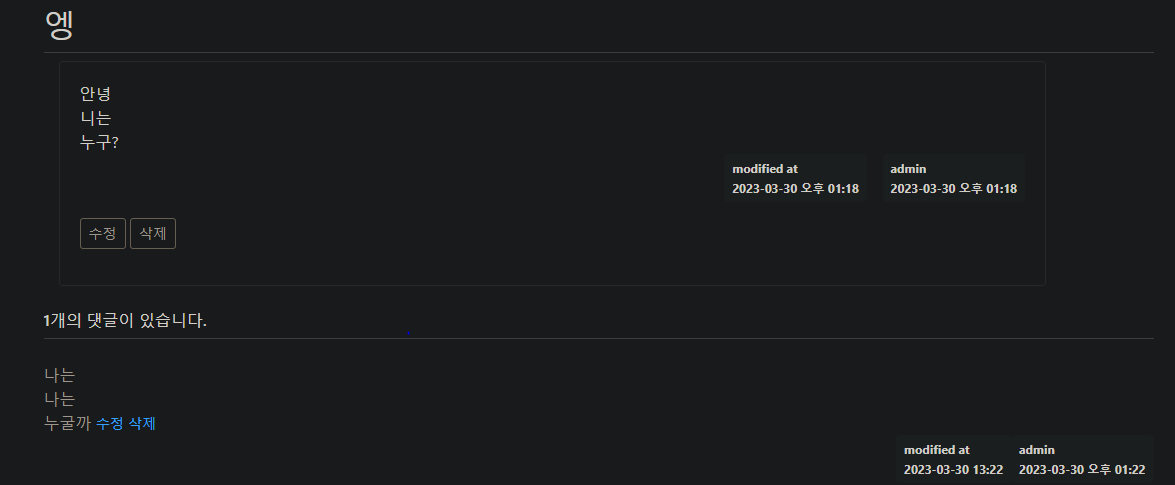

## 댓글을 내림차순(최신순)으로 정렬하기

In [ ]:
# 방법 1
# 댓글을 내림차선으로 보고자 할 때
# bbsnote/views.py의 detail함수에서 다음을 추가해주면 된다
comment = Comment.objects.all().order_by('-create_date')
context = {'board': board, 'comment': comment}

In [ ]:
# 방법 2
# bbsnote/models.py의 Comment클래스 아래에 다음 클래스를 추가해준다
    class Meta:
        ordering = ['-create_date']

* 추가적으로 admin환경에서 게시글의 번호와 그 게시글의 댓글임을 명시하게끔 다음과 같이 함수를 추가해줄 수 있다.

In [ ]:
# bbsnote/models.py의 Comment클래스 아래에 다음 함수를 추가해준다
def __str__(self):
    # 게시글의 번호와 그 게시글의 댓글임을 명시
    # 원하는 항목을 불러와서 커스터마이징 가능
    return f'[ {self.board.id}: {self.board.subject}] {self.content}'

## 만들어진 게시판 배포하기

### 1. git

* 콘다 프롬포트를 사용하여 먼저 mysite폴더에 저장소를 생성한다.

In [ ]:
# conda prompt
git init

* '.gitignore'파일을 bbsnote와 동일한 위치에 생성해준다.
* 제외파일을 추가해준뒤 저장한다.

In [ ]:
# git 등록
git add *

# git 커밋
git commit -m "bbsnote first commit"

### 2. github repository생성

* 깃허브에 레파지토리를 생성하고 로컬 저장소와 연결한다.

In [ ]:
# 소스 코드를 업로드할 저장소를 origin으로 등록
git remote add origin https://github.com/jcm821/bbsnote.git

In [ ]:
# 연결이 되었는지 확인
git remote -v

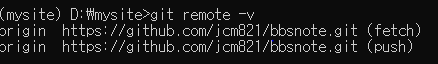

In [ ]:
# git push
git push -u origin master

* 이후 깃허브를 새로고침하면 데이터들이 정상적으로 커밋되어 올라간 것을 알 수 있다.

### 3. AWS 라이트세일 이용

* 아마존의 AWS 라이트세일을 이용한다. (3개월 무료판)
* 우분투 환경의 인스턴스를 생성해주고 AWS터미널을 열어서 다음과 같은 명령어를 실행해준다.
* 우분투환경은 일정시간 움직임이 없으면 연결이 끊기므로 기존과정을 다시 반복해야하는 불편함이 있다.

In [ ]:
# ubuntu환경에서 실행
# 현재 시간 확인
date

# 한국 시간으로 변경
sudo ln -sf /usr/share/zoneinfo/Asia/Seoul /etc/localtime
date

# 파이썬 설치 확인
python
python3

# 이후 명령어 실행창이 파이썬 인터프리터로 바뀐것을 확인할 수 있다
# 파이썬 인터프리터 종료
exit()

In [ ]:
# ubuntu 최신 업그레이드
sudo apt update

# ubuntu 가상환경 위한 패키지 설치
sudo apt install python3-venv

# 필요 디렉토리 생성
mkdir projects
mkdir venvs

# 생성된 디렉토리 및 파일 확인
ls

# 장고 가상환경 생성
cd venvs
python3 -m venv bbsnote

In [ ]:
# 가상 환경 진입
cd bbsnote
cd bin
. activate

# 가상 환경 해제
deactivate

# 장고를 불러오기 위한 wheel 패키지 설치
pip install wheel

# 장고 설치
pip install django==3.1.3

In [ ]:
# projects 디렉토리에서 github 파일 내려받기
cd ~/projects
git clone https://github.com/jcm821/bbsnote.git
    
# DB 초기화
cs bbsnote
python manage.py runserver
python manage.py migrate
python manage.py runserver

* AWS라이트세일 홈페이지에서 홈 - 인스턴스 - 네트워킹 - 고정 아이피 생성을 통해 고정IP를 생성해준다.
* 인스턴스와 마찬가지로 사용을 하지않을 경우 삭제를 해준다. 만약, 삭제를 하지 않고 무료기간이 끝나게 되면 요금이 청구된다...!

* 생성하고 나면 아래와 같이 고정IP의 정보가 나타난다.

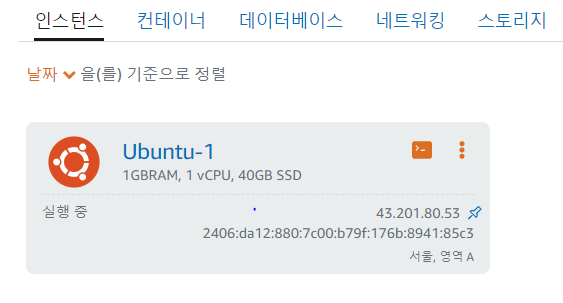

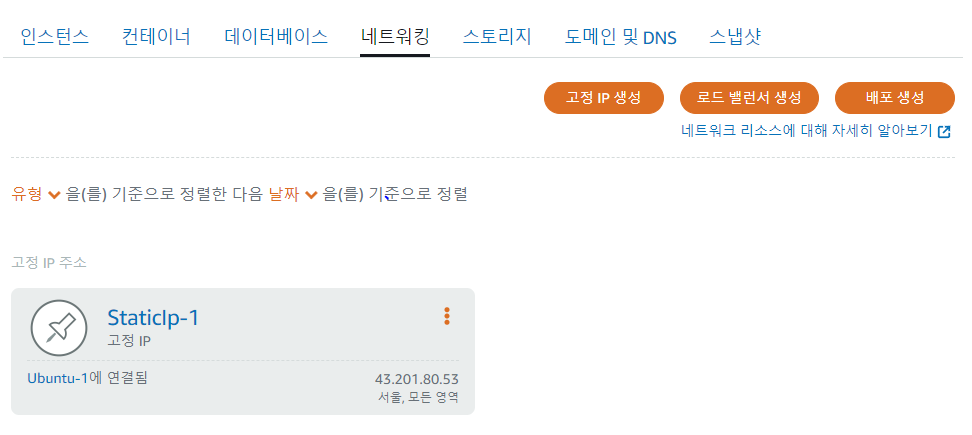

### 4. 장고 서버 서비스를 위한 setting.py 설정

In [ ]:
# config/settings.py파일에 다음항목 작성
# 라이트세일에서 생성한 고정 IP를 적어준다
ALLOWED_HOSTS = ['43.201.80.53']

In [ ]:
# conda prompt로 다시 돌아와 다음의 명령어 실행
# projects 디렉터리에서 github 파일 내려받기
git add *
git commit -m "ALLOWD_HOSTS 변경"
git push

In [ ]:
# AWS ubuntu 터미널에서 다음의 명령어 실행
# projects 디렉터리에서 github 파일 내려받기
git pull

* 이제 추가적인 명령어를 통해 AWS라이트세일을 통해 그동안 실습했던 bbsnote게시판 앱을 배포할 수 있게 된다.

In [ ]:
# 변경사항 저장을 위해 makemigrations, migrtate 진행
# makemigrations
python manage.py makemigrations

# migrate
python manage.py migrate

In [ ]:
# 배포
python manage.py runserver 0:8000

* 명령어 실행 후 웹사이트에 고정 ip였던 '43.201.80.53' 옆에 포트번호를 추가하여 '43.201.80.53:8000'와 같이 입력하게 된다면 기존에 만들어 놓았던 게시판 앱이 정상적으로 만들어 진것을 알 수 있다.

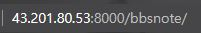

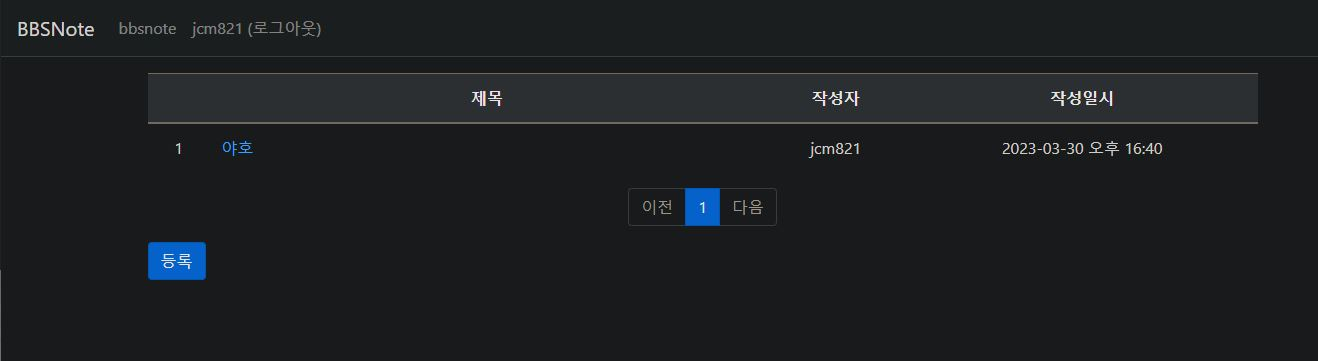

* superuser생성을 위해 ubuntu환경에서 명령어를 실행해준다.

In [ ]:
# ubuntu환경에서 다음의 명령어 실행
python manage.py createsuperuser

* 생성이 완료 된 후, 로그인을 진행하고, admin페이지로 가게 된다면 다음과 같은 페이지가 정상적으로 나올 것이다.

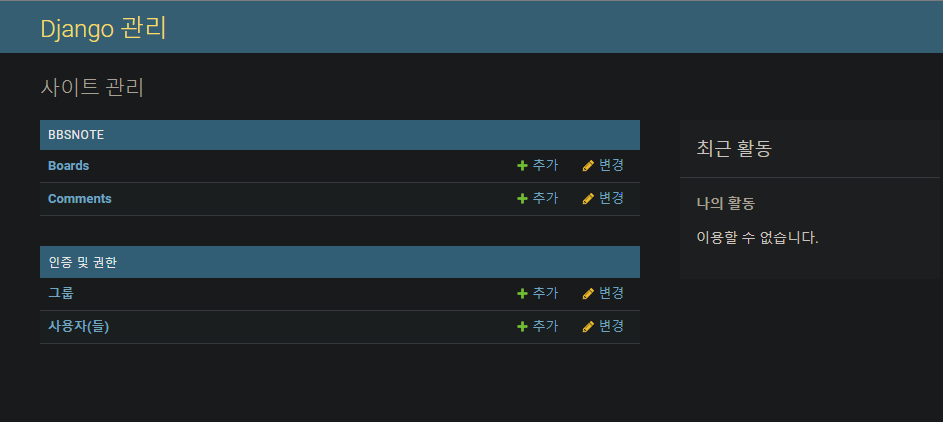